
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;">Problem Statement:
Mortality Outcomes for Females Suffering Myocardial Infarction 

A myocardial infarction (also called a heart attack) is a dangerous condition caused by a lack of blood flow to your heart muscle.
 
The mifem data frame has 1295 rows and 10 columns. This is a Dataset of females having coronary heart disease (CHD). you have to predict with the given information whether the female is dead or alive so as to discover important factors that should be considered crucial in the treatment of the disease. We use CART and RF and compare the models' performances in train and test sets. 

**Data Dictionary**

1. **Outcome:** mortality outcome: a factor with levels live, dead 
2. **Age:** age at onset 
3. **Yronset:** year of onset (The year of onset is the year on which an individual acquires, develops, or first experiences a condition or symptoms of a disease or disorder) 
4. **Premi:** previous myocardial infarction event, a factor with levels y, n, nk not known
5. **Smstat:** smoking status, a factor with levels c current, x ex-smoker, n non-smoker, nk not known
6. **Diabetes:** a factor with levels y, n, nk not known 
7. **Highbp:** high blood pressure, a factor with levels y, n, nk not known 
8. **Hichol:** high cholesterol, a factor with levels y, n for yes and no 
9. **Angina:** a factor with levels y, n, nk not known 
10. **Stroke:** a factor with levels y, n, nk not known
 

**Importing Libraries**

Importing the necessary Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings("ignore")

**Loading the data**

In [ ]:
mifem_df = pd.read_csv('mifem.csv',index_col=0)

In [ ]:
mifem_df.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,live,63.0,85,n,x,n,y,y,n,n
1,live,55.0,85,n,c,n,y,y,n,n
2,live,68.0,85,y,n,n,y,y,y,n
3,live,64.0,85,n,x,n,y,n,y,n
4,dead,67.0,85,n,n,n,y,y,n,n


In [ ]:
mifem_df.shape

(1295, 10)

In [ ]:
mifem_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   outcome   1295 non-null   object 
 1   age       1295 non-null   float64
 2   yronset   1295 non-null   int64  
 3   premi     1295 non-null   object 
 4   smstat    1295 non-null   object 
 5   diabetes  1295 non-null   object 
 6   highbp    1295 non-null   object 
 7   hichol    1295 non-null   object 
 8   angina    1295 non-null   object 
 9   stroke    1295 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 111.3+ KB


**Describe**

In [ ]:
# Study the summary statistics for the numeric columns
mifem_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1295.0,61.022394,6.749025,43.5,57.0,63.0,66.0,69.0
yronset,1295.0,88.785328,2.553647,85.0,87.0,89.0,91.0,93.0


In [ ]:
# Study the summary statistics for the non-numeric columns
mifem_df.describe(include='object')

,outcome,premi,smstat,diabetes,highbp,hichol,angina,stroke
count,1295,1295,1295,1295,1295,1295,1295,1295
unique,2,2,3,2,2,2,2,2
top,live,n,n,n,y,n,n,n
freq,974,984,625,1047,889,655,823,1142


In [ ]:
mifem_df.isnull().sum()

outcome     0
age         0
yronset     0
premi       0
smstat      0
diabetes    0
highbp      0
hichol      0
angina      0
stroke      0
dtype: int64

In [ ]:
mifem_df_Object = mifem_df.drop('outcome', axis=1)

**Encoding the data**

Here, students can use the Dummy Variable transformation as well. Let the students choose the method that they want to take.

In [ ]:
dummy_data = pd.get_dummies(mifem_df,columns=['premi', 'smstat', 'diabetes', 'highbp','hichol', 'angina', 'stroke'])
dummy_data.head()

,outcome,age,yronset,premi_n,premi_y,smstat_c,smstat_n,smstat_x,diabetes_n,diabetes_y,highbp_n,highbp_y,hichol_n,hichol_y,angina_n,angina_y,stroke_n,stroke_y
0,live,63.0,85,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
1,live,55.0,85,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0
2,live,68.0,85,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,live,64.0,85,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0
4,dead,67.0,85,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0


In [ ]:
# Data Mining algorithms in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in mifem_df_Object.columns: 
    if mifem_df_Object[feature].dtype == 'object': 
        mifem_df_Object[feature] = pd.Categorical(mifem_df_Object[feature]).codes

In [ ]:
mifem_df_Object.head()

,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,63.0,85,0,2,0,1,1,0,0
1,55.0,85,0,0,0,1,1,0,0
2,68.0,85,1,1,0,1,1,1,0
3,64.0,85,0,2,0,1,0,1,0
4,67.0,85,0,1,0,1,1,0,0


In [ ]:
mifem_df_Object['outcome'] = mifem_df['outcome']

**Data Split: Split the data into train and test.(size=0.30), random_state=1.**

In [ ]:
# capture the target column ("outcome") into separate vectors for training set and test set

X = mifem_df_Object.drop("outcome" , axis=1)

y = mifem_df_Object.outcome

In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1,stratify = y)
# Let the students pass the stratify parameters
print(X_train.shape)
print(X_test.shape)

(906, 9)
(389, 9)


**Build classification model CART - Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [ ]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

**Visualizing the Decision Tree**
1. Create a dot file which will contains all the instructions on how build this graphical visualization of the Classification Tree that you had built.
2. Go to the following $\href{http://www.webgraphviz.com/}{link}$ and paste the contents of the 'dot' file that you have created to visualize the Classification Tree.
3. Feature Importance
4. Check the train and test score.

In [ ]:
train_char_label = ['dead', 'live']
mifem_Tree_File = open('mifem_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=mifem_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
mifem_Tree_File.close()


**Alternate Visualization**

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Retrieve the column names
col_names = X.columns

# Generate the tree data for vizualization
# Signature for export_graphviz: (model, optionally column names, optionally class names)
tree_data_for_viz = export_graphviz(dt_model, feature_names=col_names, class_names=['dead', 'live'])

# Plot the decision tree using the generated tree data
tree_plot = pydotplus.graph_from_dot_data(tree_data_for_viz)

# display the decision tree
Image(tree_plot.create_png())

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


               Imp
age       0.286455
yronset   0.206136
premi     0.078130
smstat    0.117741
diabetes  0.044477
highbp    0.061711
hichol    0.057069
angina    0.102945
stroke    0.045337


In [ ]:
y_predict = dt_model.predict(X_test)

**Training Score**

In [ ]:
dt_model.score(X_train,train_labels)

0.9668874172185431

**Test Score**

In [ ]:
dt_model.score(X_test,test_labels)

0.6349614395886889

A clear case of overfitting. Let's regularize it using the Grid_Search

**Regularize the Decision Tree and Check the train and test score after regularization**

In [ ]:
params = {'criterion':['gini', 'entropy'],
         'max_depth':[5,6,7,9,10,11,13,15,16],
          'min_samples_split':list(range(1,20)),
         "min_samples_leaf":list(range(1,20))}

Below Code may take more than 5 mins to execute, you can decrease the range or directly put the best params.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_Dec = GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,verbose=1)
grid_Dec.fit(X_train, train_labels)

Fitting 5 folds for each of 6498 candidates, totalling 32490 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 32490 out of 32490 | elapsed:  3.0min finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 10, 11, 13, 15, 16],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]},
             verbose=1)

In [ ]:
grid_Dec.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion='entropy',max_depth= 5,min_samples_leaf=15,min_samples_split=2)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=15)

In [ ]:
mifem_tree_regularized = open('mifem_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= mifem_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

mifem_tree_regularized.close()

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


               Imp
age       0.333766
yronset   0.171421
premi     0.037971
smstat    0.102299
diabetes  0.000000
highbp    0.113472
hichol    0.116862
angina    0.084000
stroke    0.040210


In [ ]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

**Performance of Train and Test sets**

Accuracy, Confusion Matrix, classification_report, plot ROC curve and get ROC_AUC score for regularized Decision Tree

**Train Accuracy**

In [ ]:
reg_dt_model.score(X_train,train_labels)

0.7615894039735099

**Test Accuracy**

In [ ]:
reg_dt_model.score(X_test,test_labels)

0.7249357326478149

**AUC and ROC for the training data**

AUC: 0.689


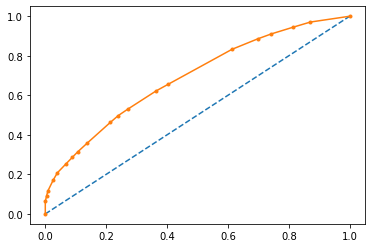

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs,pos_label='live')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**AUC and ROC for the test data** 


AUC: 0.638


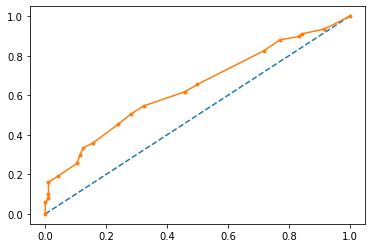

In [ ]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs,pos_label='live')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**confusion_matrix for training data**

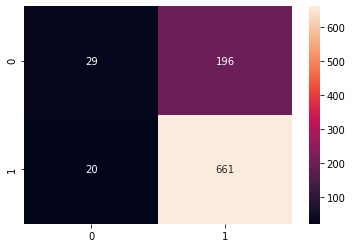

In [ ]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='.4g');

**confusion_matrix for test**

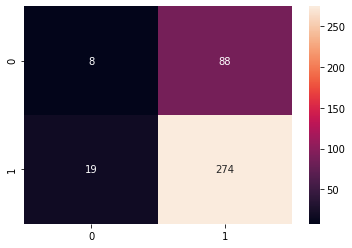

In [ ]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,fmt='.4g');

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(ytrain_predict, train_labels)
print(class_report)

              precision    recall  f1-score   support

        dead       0.13      0.59      0.21        49
        live       0.97      0.77      0.86       857

    accuracy                           0.76       906
   macro avg       0.55      0.68      0.54       906
weighted avg       0.93      0.76      0.82       906



In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(ytest_predict, test_labels)
print(class_report)

              precision    recall  f1-score   support

        dead       0.08      0.30      0.13        27
        live       0.94      0.76      0.84       362

    accuracy                           0.72       389
   macro avg       0.51      0.53      0.48       389
weighted avg       0.88      0.72      0.79       389



**Random Forest model**

In [ ]:
rfcl = RandomForestClassifier(random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

In [ ]:
rfcl.score(X_train,train_labels)

0.9668874172185431

In [ ]:
rfcl.score(X_test,test_labels)

0.7172236503856041

**Gridsearch parameters**


    'criterion' : ["gini", "entropy"]
    'max_depth': [5, 7],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [20, 50],
    'n_estimators': [301, 501]
   
   
    cv = 3

In [ ]:
rfcl = RandomForestClassifier(n_estimators = 501,random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ["gini", "entropy"],
    'max_depth': [5, 7],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [20, 50],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'max_features': [4, 6], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [20, 50],
                         'n_estimators': [301, 501]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 20,
 'n_estimators': 301}

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

**Check the performance**

**Train Accuracy**

In [ ]:
best_grid.score(X_train,train_labels)

0.7516556291390728

**Test Accuracy**

In [ ]:
best_grid.score(X_test,test_labels)

0.7532133676092545

**AUC and ROC for the training data**


AUC: 0.683


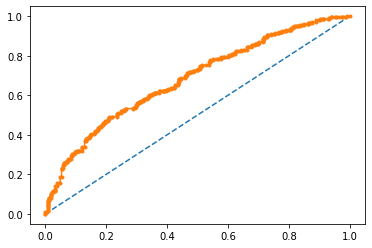

In [ ]:

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs,pos_label='live')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.658


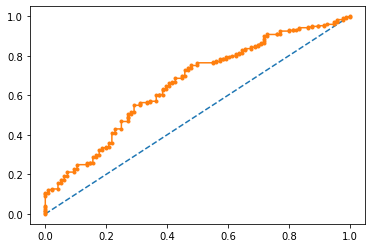

In [ ]:


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs,pos_label='live')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**confusion_matrix for training data**

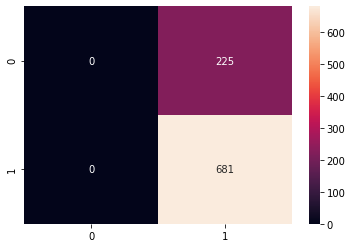

In [ ]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='.4g');

**confusion_matrix for test data**

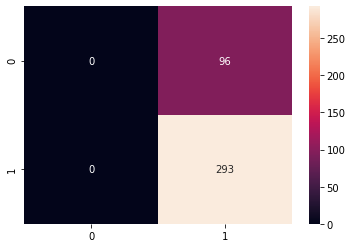

In [ ]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True,fmt='.4g');

##Model Comparison

####Comparing Accuracies from  both the models for Train and Test Sets

In [ ]:
models=[reg_dt_model,best_grid]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
for i in range(0, len(models)):
    print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],round(accuracy_score(train_labels, models[i].predict(X_train)),2)))
    print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],round(accuracy_score(test_labels, models[i].predict(X_test)),2))  )      

Accuracy Score for Train set for DecisionTreeClassifier is 0.76
Accuracy Score for Test set for DecisionTreeClassifier is 0.72
Accuracy Score for Train set for RandomForestClassifier is 0.75
Accuracy Score for Test set for RandomForestClassifier is 0.75


####Comparing Confusion Matrices from both the models for the Train Set

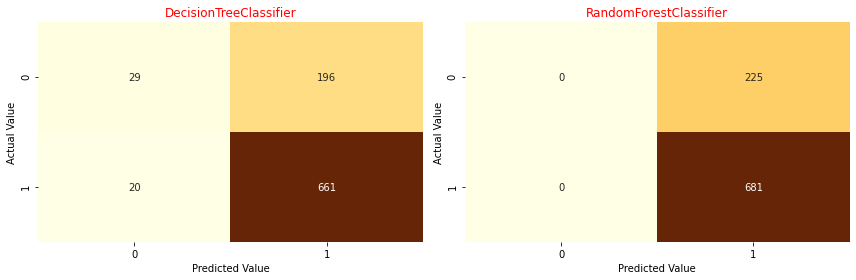

In [ ]:
models=[reg_dt_model,best_grid]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,2,i+1)
    sns.heatmap(confusion_matrix(train_labels, models[i].predict(X_train)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

####Comparing Confusion Matrices from both the models for the Test Set

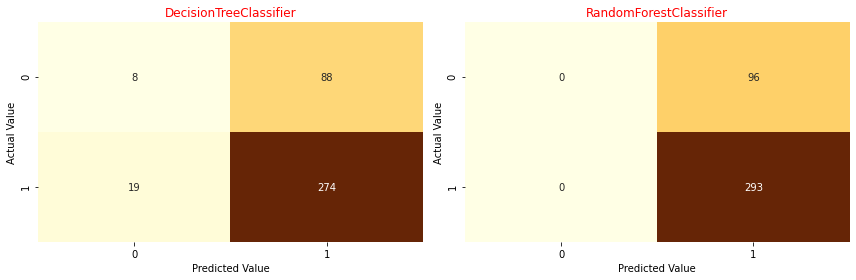

In [ ]:
models=[reg_dt_model,best_grid]
models_names={reg_dt_model:'DecisionTreeClassifier',best_grid:'RandomForestClassifier'}
fig=plt.figure(figsize=(12,4))
for i in range(0, len(models)):
    ax=fig.add_subplot(1,2,i+1)
    sns.heatmap(confusion_matrix(test_labels, models[i].predict(X_test)),annot=True, fmt='.0f',cbar=False,cmap='YlOrBr')
    ax.set_title(models_names[models[i]],color='Red')
    plt.ylabel('Actual Value')
    plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Train set')
plt.tight_layout()

Decision Tree is performing slightly better in terms of identifying cases where the patient is not likely to survive. However, both models can perform much better perhaps if more data and features are introduced.



# END